# Stage One: Import at least ten documents from files, using the OS module and any others relevant to process the text

I used the AO3 scraper (https://github.com/radiolarian/AO3Scraper) to create a .csv of ten fanifiction texts. I then used pandas to isolate the titles and body of the csv. 

# Stage Two: Isolate a component using nltk and prepare appropriate sub-files for comparison on that axis

I then used the titles to name the files. I isolated the verbs and created files from the body text that would isolate just that part of speech. 

In [47]:
import nltk
nltk.download('averaged_perceptron_tagger')
import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Rachel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
import pandas as pd
df = pd.read_csv('falcon.csv')
for index, data in df[["title", "body"]].iterrows():
    print(index) 
    print(data["title"]) 
    outname = data["title"] + "-verbs.txt"
    print(outname)
    with open(outname, 'w', errors="replace") as out:
        sentences = nltk.sent_tokenize(data["body"])
        for sentence in sentences:
            for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                    out.write(word)
                    out.write(' ')

0
Between Technology, Magic and Death
Between Technology, Magic and Death-verbs.txt
1
just won't do right
just won't do right-verbs.txt
2
diving blind
diving blind-verbs.txt
3
come with me to somewhere new
come with me to somewhere new-verbs.txt
4
Marriage Counseling for the Inept and Oblivious
Marriage Counseling for the Inept and Oblivious-verbs.txt
5
Vacant Mirrors
Vacant Mirrors-verbs.txt
6
My Two Front Teef
My Two Front Teef-verbs.txt
7
double dare
double dare-verbs.txt
8
The Gottman Method for Dealing with Conflict
The Gottman Method for Dealing with Conflict-verbs.txt
9
Skip, Reverse
Skip, Reverse-verbs.txt


# Stage Three: Load the documents and titles and run the contents through vectorize, using the provided boilerplate

In [49]:
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        if not filename.name.endswith('-verbs.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()
        start_idx, end_idx, segm_cnt = 0, max_length, 1

        while end_idx < len(lemmas):
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-verbs.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles

In [50]:
documents, titles = load_directory(".", 10_000)
import sklearn.feature_extraction.text as text
print(titles[0])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

My Two Front Teef-1
(4, 30)
['are', 'be', 'been', 'come', 'did', 'do', 'get', 'go', 'going', 'got']


# Stage Four: Run a simple (2 word) visualization comparing all texts

I ran a 2 word visualization using the commonly used words "come" and "did". However, it only ran the visualization for 4 of my fanfiction texts, and I'm not sure why. 

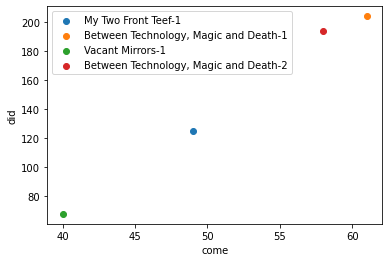

In [51]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('come')]
y = v_documents[:, words.index('did')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='come', ylabel='did')
plt.legend()

In [52]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(4, 30)
(4, 2)


# Stage Five: Run a full (PCA) visualization comparing all texts using the provided PCA boilerplate. 

Once again, only 4 of my fanfiction texts appear in my visualization. Because of this, it is difficult to see outliers. However, two of the texts, being chapters from the same series and author, understandably have similar textual make-ups. "My Two Front Teef" and "Vacant Mirrors" appear to be very different from one another, as well as fairly different from "Between Technology..." 


[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

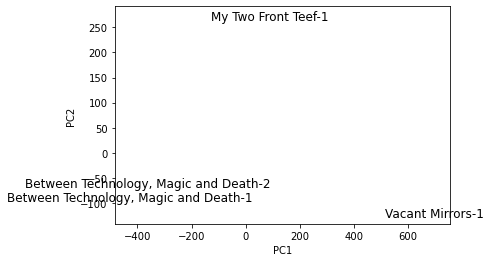

In [53]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title, fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2')